In [1]:
from train_latent_space import BRepDS, BRepFaceAutoencoder, BRepFaceEncoder, implicit_part_to_data, ImplicitPart, ImplicitDecoder

In [2]:
data_root = '/media/ben/Data/cad'
model_checkpoint_path = data_root + '/BRepFaceAutoencoder_64_1024_4.ckpt'
cube_path = data_root + '/cubes/cube.x_t'
long_cube_path = data_root + '/cubes/long_cube.x_t'
angled_cube_path = data_root + '/cubes/angled_cube.x_t'

In [6]:
import torch
from chamferdist import ChamferDistance

source_cloud = torch.randn(1, 100, 3).cuda()
target_cloud = torch.randn(1, 50, 3).cuda()

chamferDist = ChamferDistance()

dist_forward = chamferDist(source_cloud, target_cloud)
print(dist_forward.detach().cpu().item())

52.79950714111328


In [8]:
dist_forward

tensor(52.7995, device='cuda:0')

In [3]:
ipart = ImplicitPart(cube_path, 10, 100, True)

In [4]:
ipart = ImplicitPart(cube_path, 10, 100, True)
data = implicit_part_to_data(ipart, 10)

In [5]:
data

HetData(bounding_box=[2, 3], face_surfaces=[6, 5], face_surface_parameters=[6, 11], face_surface_flipped=[6], loop_types=[6, 10], loop_length=[6], edge_curves=[12, 3], edge_curve_parameters=[12, 11], edge_curve_flipped=[12], edge_length=[12], vertex_positions=[8, 3], face_to_face=[3, 12], face_to_loop=[2, 6], loop_to_edge=[2, 24], edge_to_vertex=[2, 24], loop_to_vertex=[2, 0], edge_to_vertex_is_start=[24], loop_to_edge_flipped=[24], surface_bounds=[6, 2, 2], surface_coords=[6, 10, 2], surface_samples=[6, 10, 7], curve_bounds=[12, 2], curve_samples=[12, 4, 6])

In [10]:
import torch
model = BRepFaceAutoencoder(64,1024,4)
ckpt = torch.load(model_checkpoint_path)
model.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

In [11]:
model = BRepFaceAutoencoder(64,1024,4)
ckpt = torch.load(model_checkpoint_path)
model.load_state_dict(ckpt['state_dict'])
n_faces = 6
N = 50
line = torch.linspace(-0.1,1.1,N)
grid = torch.cartesian_prod(line, line)
grids = grid.repeat(n_faces,1)
indices = torch.arange(n_faces).repeat_interleave(N*N, dim=0)

/home/ben/anaconda3/envs/automate/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [12]:
pred = model(data, grids, indices)

In [13]:
import meshplot as mp

In [ ]:
mp.plot(pred[:,:3].detach().numpy(), c=pred[:,3].detach().numpy(), shading={'point_size':1})

In [47]:
cube_part = Part(cube_path, opts)

In [37]:
from pspy import Part, PartOptions
import numpy as np

In [41]:
pred_xyz = pred[:,:3].detach().numpy()
pred_m = pred[:,3].detach().numpy()


In [43]:
pred_xyz.max(axis=0)

array([1.2384077, 1.2069366, 1.2218487], dtype=float32)

In [54]:
from torch_geometric.transforms import SamplePoints

In [55]:
sampler = SamplePoints(6*1000)

In [57]:
from torch_geometric.data import Data as TGData

In [69]:
opts = PartOptions()
opts.normalize = True
angled_part = Part(angled_cube_path, opts)
angled_V = torch.from_numpy(2*angled_part.mesh.V)
angled_F = torch.from_numpy(angled_part.mesh.F).T.long()
angled_data = TGData(pos=angled_V, face=angled_F)
sampler(angled_data)
target_pc = angled_data.pos

Data(pos=[6000, 3])

In [68]:
angled_data.pos

tensor([[-0.5508,  0.2843, -0.7887],
        [-0.6832,  0.5774,  0.0289],
        [-0.3737,  0.5774, -0.0206],
        ...,
        [ 0.9981, -0.1620, -0.7818],
        [ 0.4532,  0.5774, -0.3701],
        [-1.0000, -0.5343, -0.6798]], dtype=torch.float64)

In [ ]:
plot = mp.plot(2*angled_part.mesh.V, angled_part.mesh.F, return_plot=True)
plot.add_points(target_pc.numpy(), shading={'point_size':0.3, 'point_color':'red'})
plot.add_points(pred_xyz, c=pred_m, shading={'point_size':.1})

In [18]:
angled = ImplicitPart(angled_cube_path, 1000, 5000, True)

In [25]:
target_pc = np.stack(angled.surface_samples)[:,:,3].reshape((-1,3))

In [ ]:
mp.plot(target_pc, shading={'point_size':.5})

In [ ]:
import torch
from chamferdist import ChamferDistance

#source_cloud = torch.randn(1, 100, 3).cuda()
#target_cloud = torch.randn(1, 50, 3).cuda()



dist_forward = chamferDist(source_cloud, target_cloud)
print(dist_forward.detach().cpu().item())

In [ ]:
from tqdm.notebook import tqdm

chamferDist = ChamferDistance()
opts = PartOptions()
opts.normalize = True
angled_part = Part(angled_cube_path, opts)
angled_V = torch.from_numpy(2*angled_part.mesh.V)
angled_F = torch.from_numpy(angled_part.mesh.F).T.long()
angled_data = TGData(pos=angled_V, face=angled_F)
sampler(angled_data)
target_pc = angled_data.pos
target = target_pc.unsqueeze(0).float().cuda()

ipart = ImplicitPart(cube_path, 10, 100, True)
data = implicit_part_to_data(ipart, 10).cuda()
data.face_surfaces = data.face_surfaces.float()
data.face_surfaces.requires_grad = True
data.edge_curves = data.edge_curves.float()
data.edge_curves.requires_grad = True
data.vertex_positions.requires_grad = True
data.face_surface_parameters.requires_grad = True
data.edge_curve_parameters.requires_grad = True

model = BRepFaceAutoencoder(64,1024,4)
ckpt = torch.load(model_checkpoint_path)
model.load_state_dict(ckpt['state_dict'])

n_faces = 6
N = 50
line = torch.linspace(-0.1,1.1,N)
grid = torch.cartesian_prod(line, line)
grids = grid.repeat(n_faces,1)
indices = torch.arange(n_faces).repeat_interleave(N*N, dim=0)


model = model.cuda()
grids = grids.cuda()
indices = indices.cuda()

opt = torch.optim.SGD(
    [
        data.face_surfaces,
        data.edge_curves,
        data.edge_curve_parameters,
        data.vertex_positions,
        data.face_surface_parameters
    ], 
    lr=0.001, 
    momentum=0.5)

losses = []
predictions = []

num_iters = 1000

for iter in tqdm(range(num_iters)):
    opt.zero_grad()
    pred = model(data, grids, indices)
    pred_xyz = pred[:,:3].unsqueeze(0).float()
    pred_m = pred[:,3].unsqueeze(0).float()
    loss = chamferDist(pred_xyz, target) + chamferDist(target, pred_xyz)
    loss.backward()
    opt.step()
    losses.append(loss.detach().item())
    predictions.append((pred_xyz.detach().cpu().numpy(), pred_m.detach().cpu().numpy()))
    #print(loss)
plt.plot(losses)
i = 0
plot1 = mp.plot(
    predictions[i][0][0,:,:],
    c=predictions[i][1][0,:],
    shading={'point_size':0.1},
    return_plot = True)
plot1.add_points(target_pc.numpy(), shading={'point_size':0.1, 'point_color':'red'})

i = num_iters - 1
plot2 =mp.plot(
    predictions[i][0][0,:,:],
    c=predictions[i][1][0,:],
    shading={'point_size':0.1},
    return_plot=True)
plot2.add_points(target_pc.numpy(), shading={'point_size':0.1, 'point_color':'red'})

In [ ]:
i = 9
mp.plot(
    predictions[i][0][0,:,:],
    c=predictions[i][1][0,:],
    shading={'point_size':0.5})

In [89]:
pred = model(data, grids, indices)
pred_xyz = pred[:,:3].unsqueeze(0).float()
pred_m = pred[:,3].unsqueeze(0).float()
loss = chamferDist(pred_xyz, target) + chamferDist(target, pred_xyz)
#loss.backward()
#opt.step()
#losses.append(loss.detach().item())
#params.append(data.face_surface_parameters.detach().numpy())

In [92]:
data.face_surface_parameters.requires_grad

False

In [ ]:
i = num_iters - 1
plot2 =mp.plot(
    predictions[i][0][0,:,:],
    c=predictions[i][1][0,:],
    shading={'point_size':0.1},
    return_plot=True)
plot2.add_points(target_pc.numpy(), shading={'point_size':0.1, 'point_color':'red'})
plot2.add_mesh(angled_V.numpy(), angled_F.T.numpy())

In [80]:
chamferDist(pred_xyz.unsqueeze(0).float(), target_pc.unsqueeze(0).float())

tensor(1644.8860, grad_fn=<MeanBackward0>)

In [85]:
from matplotlib import pyplot as plt

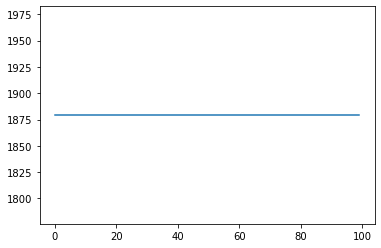

In [86]:
plt.plot(losses)